In [2]:
import pandas as pd
import numpy as np

In [3]:
df_medals = pd.read_excel('../data/winter-olympic-medals.xlsx')
print(df_medals.head().to_markdown())

|    |   Year | Sport                | Event               | Country     | Gender   |   Medal Rank | Medal   | Name of Athlete or Team   |   Age of Athlete |
|---:|-------:|:---------------------|:--------------------|:------------|:---------|-------------:|:--------|:--------------------------|-----------------:|
|  0 |   1924 | Bobsled              | Men's Four/Five     | Switzerland | Men      |            1 | gold    | Switzerland-1             |              nan |
|  1 |   1924 | Bobsled              | Men's Four/Five     | Britain     | Men      |            2 | silver  | Britain-1                 |              nan |
|  2 |   1924 | Bobsled              | Men's Four/Five     | Belgium     | Men      |            3 | bronze  | Belgium-1                 |              nan |
|  3 |   1924 | Cross-Country Skiing | Men's 18 Kilometers | Norway      | Men      |            1 | gold    | Thorleif Haug             |               29 |
|  4 |   1924 | Cross-Country Skiing | Men's 18 Kilo

In [3]:
df_medals.columns

Index(['Year', 'Sport', 'Event', 'Country', 'Gender', 'Medal Rank', 'Medal',
       'Name of Athlete or Team', 'Age of Athlete'],
      dtype='object')

In [4]:
df_medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2865 entries, 0 to 2864
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     2865 non-null   int64  
 1   Sport                    2865 non-null   object 
 2   Event                    2865 non-null   object 
 3   Country                  2865 non-null   object 
 4   Gender                   2865 non-null   object 
 5   Medal Rank               2865 non-null   int64  
 6   Medal                    2865 non-null   object 
 7   Name of Athlete or Team  2865 non-null   object 
 8   Age of Athlete           2173 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 201.6+ KB


In [5]:
df_medals.describe()

,Year,Medal Rank,Age of Athlete
count,2865.000000,2865.000000,2173.000000
mean,1986.488656,1.995812,25.152324
std,23.489775,0.815773,4.271764
min,1924.000000,1.000000,14.000000
25%,1972.000000,1.000000,22.000000
50%,1992.000000,2.000000,25.000000
75%,2006.000000,3.000000,28.000000
max,2014.000000,3.000000,42.000000


In [6]:
df_medals.groupby('Gender').count()['Year']

Gender
Men      1711
Mixed     109
Women    1045
Name: Year, dtype: int64

## Questions

- Does the US have better female medal representation (% medals) than China? Russia? Iran? England?

- How did the % of female sports in the olympics change over time?

- Is there a country that has better female medal representation overall? 
        - Does China's dominance in female gymastics skew the results?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc343490050>,
      dtype=object)

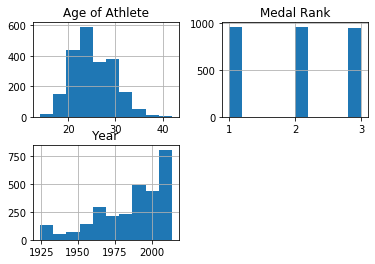

In [7]:
df_medals.hist()

In [8]:
df_medals['gender_num'] = np.where(df_medals['Gender'] == 'Men', 1, 0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3430ffc90>,
      dtype=object)

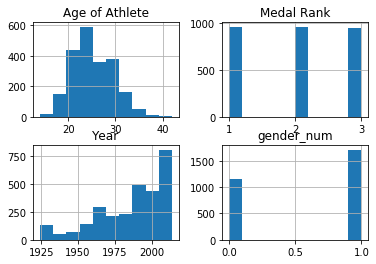

In [9]:
df_medals.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdc6aa52f10>,
      dtype=object)

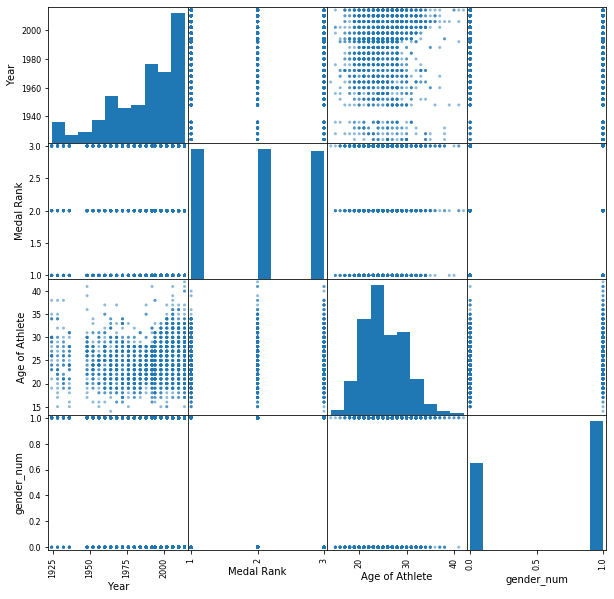

In [14]:
pd.plotting.scatter_matrix(df_medals, figsize=(10,10))

# % Women's Events Over Time

In [10]:
df_medals.head()

,Year,Sport,Event,Country,Gender,Medal Rank,Medal,Name of Athlete or Team,Age of Athlete,gender_num
0,1924,Bobsled,Men's Four/Five,Switzerland,Men,1,gold,Switzerland-1,NaN,1
1,1924,Bobsled,Men's Four/Five,Britain,Men,2,silver,Britain-1,NaN,1
2,1924,Bobsled,Men's Four/Five,Belgium,Men,3,bronze,Belgium-1,NaN,1
3,1924,Cross-Country Skiing,Men's 18 Kilometers,Norway,Men,1,gold,Thorleif Haug,29.0,1
4,1924,Cross-Country Skiing,Men's 18 Kilometers,Norway,Men,2,silver,Johan GrÃ¸ttumsbraaten,24.0,1


In [11]:
df_medals['gender_male'] = np.where(df_medals['Gender'] == 'Men', 1, 0)
df_medals['gender_female'] = np.where(df_medals['Gender'] == 'Women', 1, 0)
df_medals.head()

,Year,Sport,Event,Country,Gender,Medal Rank,Medal,Name of Athlete or Team,Age of Athlete,gender_num,gender_male,gender_female
0,1924,Bobsled,Men's Four/Five,Switzerland,Men,1,gold,Switzerland-1,NaN,1,1,0
1,1924,Bobsled,Men's Four/Five,Britain,Men,2,silver,Britain-1,NaN,1,1,0
2,1924,Bobsled,Men's Four/Five,Belgium,Men,3,bronze,Belgium-1,NaN,1,1,0
3,1924,Cross-Country Skiing,Men's 18 Kilometers,Norway,Men,1,gold,Thorleif Haug,29.0,1,1,0
4,1924,Cross-Country Skiing,Men's 18 Kilometers,Norway,Men,2,silver,Johan GrÃ¸ttumsbraaten,24.0,1,1,0


In [12]:
df_gender_by_year = df_medals.groupby(['Year', 'Sport', 'Event']).sum().copy()
df_gender_by_year.head()

Medal Rank  \
Year Sport                Event                                   
1924 Biathlon             Men's Military Ski Patrol           6   
     Bobsled              Men's Four/Five                     6   
     Cross-Country Skiing Men's 18 Kilometers                 6   
                          Men's 50 Kilometers                 6   
     Curling              Men's Curling                       6   

                                                     Age of Athlete  \
Year Sport                Event                                       
1924 Biathlon             Men's Military Ski Patrol             0.0   
     Bobsled              Men's Four/Five                       0.0   
     Cross-Country Skiing Men's 18 Kilometers                  81.0   
                          Men's 50 Kilometers                  80.0   
     Curling              Men's Curling                         0.0   

                                                     gender_num  gender_male  \
Year Sport                Event                                                
1924 Biathlon             Men's Military Ski Patrol           3            3   
     Bobsled              Men's Four/Five                     3            3   
     Cross-Country Skiing Men's 18 Kilometers                 3            3   
                          Men's 50 Kilometers                 3            3   
     Curling              Men's Curling                       3            3   

                                                     gender_female  
Year Sport                Event                                     
1924 Biathlon             Men's Military Ski Patrol              0  
     Bobsled              Men's Four/Five                        0  
     Cross-Country Skiing Men's 18 Kilometers                    0  
                          Men's 50 Kilometers                    0  
     Curling              Men's Curling                          0

In [13]:
df_gender_by_year.drop(['Medal Rank', 'Age of Athlete'], axis=1, inplace=True)
df_gender_by_year.head()

gender_num  gender_male  \
Year Sport                Event                                                
1924 Biathlon             Men's Military Ski Patrol           3            3   
     Bobsled              Men's Four/Five                     3            3   
     Cross-Country Skiing Men's 18 Kilometers                 3            3   
                          Men's 50 Kilometers                 3            3   
     Curling              Men's Curling                       3            3   

                                                     gender_female  
Year Sport                Event                                     
1924 Biathlon             Men's Military Ski Patrol              0  
     Bobsled              Men's Four/Five                        0  
     Cross-Country Skiing Men's 18 Kilometers                    0  
                          Men's 50 Kilometers                    0  
     Curling              Men's Curling                          0

In [14]:
df_gender_by_year['gender_male'] = np.where(df_gender_by_year['gender_male'] > 0, 1, 0)
df_gender_by_year['gender_female'] = np.where(df_gender_by_year['gender_female'] > 0, 1, 0)
df_gender_by_year.head()

gender_num  gender_male  \
Year Sport                Event                                                
1924 Biathlon             Men's Military Ski Patrol           3            1   
     Bobsled              Men's Four/Five                     3            1   
     Cross-Country Skiing Men's 18 Kilometers                 3            1   
                          Men's 50 Kilometers                 3            1   
     Curling              Men's Curling                       3            1   

                                                     gender_female  
Year Sport                Event                                     
1924 Biathlon             Men's Military Ski Patrol              0  
     Bobsled              Men's Four/Five                        0  
     Cross-Country Skiing Men's 18 Kilometers                    0  
                          Men's 50 Kilometers                    0  
     Curling              Men's Curling                          0

In [15]:
df_gender_by_year.reset_index(inplace=True)

In [16]:
df_gender_by_year = df_gender_by_year.groupby('Year').sum()

In [17]:
df_gender_by_year.head()

,gender_num,gender_male,gender_female
Year,,,
1924,43,14,1
1928,35,11,1
1932,36,12,1
1936,42,14,2
1948,53,17,4


In [18]:
df_gender_by_year.rename(columns={"gender_male": "male_events", "gender_female": "female_events"}, inplace=True)
df_gender_by_year.head()

,gender_num,male_events,female_events
Year,,,
1924,43,14,1
1928,35,11,1
1932,36,12,1
1936,42,14,2
1948,53,17,4


In [19]:
df_gender_by_year['total_events'] = df_gender_by_year['male_events'] + df_gender_by_year['female_events']
df_gender_by_year['%_female_events'] = df_gender_by_year['female_events']/df_gender_by_year['total_events'] * 100

In [49]:
print(df_gender_by_year.drop('gender_num', axis=1).head().to_markdown())

|   Year |   male_events |   female_events |   total_events |   %_female_events |
|-------:|--------------:|----------------:|---------------:|------------------:|
|   1924 |            14 |               1 |             15 |           6.66667 |
|   1928 |            11 |               1 |             12 |           8.33333 |
|   1932 |            12 |               1 |             13 |           7.69231 |
|   1936 |            14 |               2 |             16 |          12.5     |
|   1948 |            17 |               4 |             21 |          19.0476  |


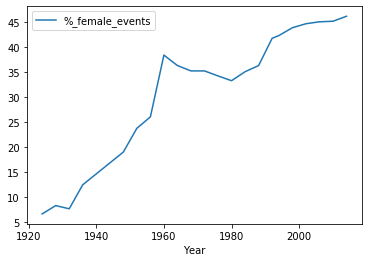

In [21]:
df_gender_by_year.plot(y='%_female_events')

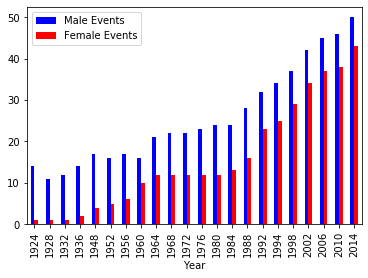

In [22]:
df_gender_by_year.plot(y=['male_events', 'female_events'], kind='bar', label=['Male Events', 'Female Events'], color=['blue', 'red'])

In [23]:
df_gender_by_year.diff()

,gender_num,male_events,female_events,total_events,%_female_events
Year,,,,,
1924,NaN,NaN,NaN,NaN,NaN
1928,-8.0,-3.0,0.0,-3.0,1.666667
1932,1.0,1.0,0.0,1.0,-0.641026
1936,6.0,2.0,1.0,3.0,4.807692
1948,11.0,3.0,2.0,5.0,6.547619
1952,-4.0,-1.0,1.0,0.0,4.761905
1956,2.0,1.0,1.0,2.0,2.277433
1960,-3.0,-1.0,4.0,3.0,12.374582
1964,16.0,5.0,2.0,7.0,-2.097902


- 12% increase in female events compared to total events in 1960. 
- This corresponds to the women's rights movement in the US.
- 1960 Winter Olympics held in Squaw Valley, CA
- only time Bobsled was not in the winter olympics (possible reason for the number of men's events decreasing by 1)
- 1960 new female sports: speed skating (4 events: 500m, 1000m, 1500m, 3000m)

# Women by Country

In [24]:
df_medals.head()

,Year,Sport,Event,Country,Gender,Medal Rank,Medal,Name of Athlete or Team,Age of Athlete,gender_num,gender_male,gender_female
0,1924,Bobsled,Men's Four/Five,Switzerland,Men,1,gold,Switzerland-1,NaN,1,1,0
1,1924,Bobsled,Men's Four/Five,Britain,Men,2,silver,Britain-1,NaN,1,1,0
2,1924,Bobsled,Men's Four/Five,Belgium,Men,3,bronze,Belgium-1,NaN,1,1,0
3,1924,Cross-Country Skiing,Men's 18 Kilometers,Norway,Men,1,gold,Thorleif Haug,29.0,1,1,0
4,1924,Cross-Country Skiing,Men's 18 Kilometers,Norway,Men,2,silver,Johan GrÃ¸ttumsbraaten,24.0,1,1,0


In [25]:
df_medals['gender_mixed'] = np.where(df_medals['Gender'] == 'Mixed', 1, 0)
df_medals.head(5)

,Year,Sport,Event,Country,Gender,Medal Rank,Medal,Name of Athlete or Team,Age of Athlete,gender_num,gender_male,gender_female,gender_mixed
0,1924,Bobsled,Men's Four/Five,Switzerland,Men,1,gold,Switzerland-1,NaN,1,1,0,0
1,1924,Bobsled,Men's Four/Five,Britain,Men,2,silver,Britain-1,NaN,1,1,0,0
2,1924,Bobsled,Men's Four/Five,Belgium,Men,3,bronze,Belgium-1,NaN,1,1,0,0
3,1924,Cross-Country Skiing,Men's 18 Kilometers,Norway,Men,1,gold,Thorleif Haug,29.0,1,1,0,0
4,1924,Cross-Country Skiing,Men's 18 Kilometers,Norway,Men,2,silver,Johan GrÃ¸ttumsbraaten,24.0,1,1,0,0


In [26]:
df_medals_by_country = df_medals.groupby('Country').sum()
df_medals_by_country.head()

,Year,Medal Rank,Age of Athlete,gender_num,gender_male,gender_female,gender_mixed
Country,,,,,,,
Australia,24080,23,294.0,5,5,7,0
Austria,432538,458,4669.0,143,143,70,5
Belarus,30106,29,406.0,8,8,7,0
Belgium,9746,12,48.0,4,4,0,1
Britain,51246,54,364.0,13,13,11,2


In [27]:
df_medals_by_country.drop(['Year','Medal Rank', 'Age of Athlete'], axis=1, inplace=True)

In [28]:
df_medals_by_country.head()

,gender_num,gender_male,gender_female,gender_mixed
Country,,,,
Australia,5,5,7,0
Austria,143,143,70,5
Belarus,8,8,7,0
Belgium,4,4,0,1
Britain,13,13,11,2


In [29]:
df_medals_by_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, Australia to Yugoslavia
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   gender_num     44 non-null     int64
 1   gender_male    44 non-null     int64
 2   gender_female  44 non-null     int64
 3   gender_mixed   44 non-null     int64
dtypes: int64(4)
memory usage: 1.7+ KB


In [30]:
df_medals_by_country.rename(columns={"gender_male": "male_medals", "gender_female": "female_medals", "gender_mixed": "mixed_medals"}, inplace=True)
df_medals_by_country.head()

,gender_num,male_medals,female_medals,mixed_medals
Country,,,,
Australia,5,5,7,0
Austria,143,143,70,5
Belarus,8,8,7,0
Belgium,4,4,0,1
Britain,13,13,11,2


In [31]:
df_medals_by_country['total_medals'] = df_medals_by_country.sum(axis=1)
df_medals_by_country.head()

,gender_num,male_medals,female_medals,mixed_medals,total_medals
Country,,,,,
Australia,5,5,7,0,17
Austria,143,143,70,5,361
Belarus,8,8,7,0,23
Belgium,4,4,0,1,9
Britain,13,13,11,2,39


In [32]:
df_medals_by_country.sort_values(by='female_medals', ascending=False)

,gender_num,male_medals,female_medals,mixed_medals,total_medals
Country,,,,,
Germany,97,97,123,8,325
United States,155,155,116,11,437
Canada,82,82,77,11,252
Austria,143,143,70,5,361
Soviet Union,104,104,70,20,298
Norway,270,270,58,1,599
Russia,57,57,49,18,181
East Germany,62,62,44,4,172
Finland,119,119,41,1,280


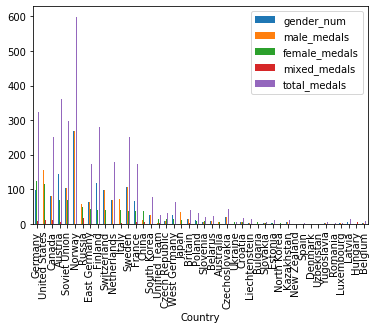

In [33]:
df_medals_by_country.sort_values(by='female_medals', ascending=False).plot(kind='bar')

In [34]:
df_medals_by_country_50 = df_medals_by_country[df_medals_by_country['total_medals'] > 50]

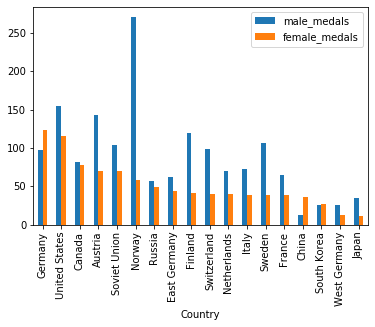

In [35]:
df_medals_by_country_50.sort_values(by='female_medals', ascending=False).plot(y=['male_medals', 'female_medals'], kind='bar')

In [36]:
df_medals[df_medals['Country'] == 'East Germany']['Year'].unique()

array([1968, 1972, 1976, 1980, 1984, 1988])

In [37]:
df_medals['Year'].unique()

array([1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972,
       1976, 1980, 1984, 1988, 1992, 1994, 1998, 2002, 2006, 2010, 2014])

In [38]:
df_medals[df_medals['Country'] == 'Soviet Union']['Year'].unique()

array([1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988])

In [39]:
df_medals[df_medals['Country'] == 'Russia']['Year'].unique()

array([1994, 1998, 2002, 2006, 2010, 2014])

In [40]:
df_medals[df_medals['Country'] == 'China']['Year'].unique()

array([1992, 1994, 1998, 2002, 2006, 2010, 2014])

In [41]:
df_medals_by_country['total_medals'] = df_medals_by_country.sum(axis=1)
df_medals_by_country.head()

,gender_num,male_medals,female_medals,mixed_medals,total_medals
Country,,,,,
Australia,5,5,7,0,34
Austria,143,143,70,5,722
Belarus,8,8,7,0,46
Belgium,4,4,0,1,18
Britain,13,13,11,2,78


In [63]:
df_medals_by_country['total_medals_no_mix'] = df_medals_by_country[['male_medals', 'female_medals']].sum(axis=1)
print(df_medals_by_country.drop(['gender_num', 'total_medals_no_mix'], axis=1).head().to_markdown())

| Country   |   male_medals |   female_medals |   mixed_medals |   total_medals |
|:----------|--------------:|----------------:|---------------:|---------------:|
| Australia |             5 |               7 |              0 |             34 |
| Austria   |           143 |              70 |              5 |            722 |
| Belarus   |             8 |               7 |              0 |             46 |
| Belgium   |             4 |               0 |              1 |             18 |
| Britain   |            13 |              11 |              2 |             78 |


In [4]:
df_medals['Country'].nunique()

44

In [5]:
df_medals[df_medals['Year'] > 1993]

,Year,Sport,Event,Country,Gender,Medal Rank,Medal,Name of Athlete or Team,Age of Athlete
1436,1994,Alpine Skiing,Men's Downhill,United States,Men,1,gold,Tommy Moe,23.0
1437,1994,Alpine Skiing,Men's Downhill,Norway,Men,2,silver,Kjetil AndrÃ© Aamodt,22.0
1438,1994,Alpine Skiing,Men's Downhill,Canada,Men,3,bronze,Ed Podivinsky,23.0
1439,1994,Alpine Skiing,Men's Super G,Germany,Men,1,gold,Markus Wasmeier,30.0
1440,1994,Alpine Skiing,Men's Super G,United States,Men,2,silver,Tommy Moe,23.0
...,...,...,...,...,...,...,...,...,...
2860,2014,Cross-Country Skiing,Men's 50 Kilometers,Russia,Men,1,gold,Alexander Legkov,30.0
2861,2014,Cross-Country Skiing,Men's 50 Kilometers,Russia,Men,2,silver,Maxim Vylegzhanin,31.0
2862,2014,Cross-Country Skiing,Men's 50 Kilometers,Russia,Men,3,bronze,Ilia Chernousov,27.0
2863,2014,Ice Hockey,Men's Ice Hockey,Canada,Men,1,gold,Canada,NaN
